In [11]:
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_excel('data3.xlsx')

In [14]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
 df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [16]:
 df.tail()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78
9550,18246202,VNS Live Studio,1,Varanasi,"Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...",Sigra,"Sigra, Varanasi",82.991694,25.318345,"Chinese, North Indian",0,Indian Rupees(Rs.),No,No,1,3.5,Yellow,Good,109


In [17]:
df.shape

(9551, 19)

In [18]:
#finding null in rows
df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [20]:
#df.duplicated
df[df.duplicated()]
#df.drop_duplicates(keep='last', inplace=True)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes


In [22]:
df.drop_duplicates(keep='last', inplace=True)

In [23]:
df.shape

(9551, 19)

In [26]:
df['City'].size

9551

In [27]:
 df.dropna(how='any')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78


In [28]:
df.shape

(9551, 19)

In [29]:
 df['City'].nunique()

141

In [30]:
df1=df.groupby(by='City')['Restaurant ID'].count()

In [31]:
df1.max()

5473

In [32]:
df1.min()

1

In [33]:
print(df1)

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
€¡stanbul          14
Name: Restaurant ID, Length: 141, dtype: int64


In [34]:
print (df1.max())

5473


In [35]:
print (df1.argmax())

88


In [36]:
 df2=(df.groupby(by='City')['Restaurant ID'].count()==5483)

In [37]:
df1=df.groupby(by='City')['Restaurant ID'].count().sort_values()

In [39]:
print(df1)

City
Ojo Caliente         1
Clatskanie           1
Cochrane             1
Phillip Island       1
Potrero              1
                  ... 
Ghaziabad           25
Faridabad          251
Noida             1080
Gurgaon           1118
New Delhi         5473
Name: Restaurant ID, Length: 141, dtype: int64


In [40]:
df2=df["Restaurant Name"].nunique()

In [41]:
print (df2)

7445


In [42]:
df.size

181469

In [44]:
df['Cuisines'] = df['Cuisines'].str. split(",",expand = True)
df['Cuisines'].unique()

ValueError: Columns must be same length as key

In [45]:
 print (df['Cuisines'])

0                                    Italian, Continental
1                              Asian, Indonesian, Western
2                                         Sushi, Japanese
3                                                Japanese
4                                         French, Western
                              ...                        
9546                     Chinese, North Indian, Fast Food
9547                         Indian, Chinese, Continental
9548    Cafe, Continental, Desserts, Ice Cream, Italia...
9549                                          Street Food
9550                                Chinese, North Indian
Name: Cuisines, Length: 9551, dtype: object


In [46]:
 #checking duplicate variable wise-restaurant only
df.pivot_table(index=['Restaurant ID'],aggfunc='size')

Restaurant ID
53          1
55          1
60          1
64          1
65          1
           ..
18499493    1
18500618    1
18500628    1
18500639    1
18500652    1
Length: 9551, dtype: int64

In [47]:
df['Restaurant ID'].duplicated().sum()

0

In [48]:
#checking duplicate variable wise-restaurant name only
df.pivot_table(index=['Restaurant Name'],aggfunc='size')

Restaurant Name
12212                   1
 Let's Burrrp           1
#45                     1
#Dilliwaala6            1
#InstaFreeze            1
                       ..
t Lounge by Dilmah      1
tashas                  1
wagamama                1
{Niche} - Cafe & Bar    1
Ìàukura€Ùa Sofras€±     1
Length: 7445, dtype: int64

In [49]:
 #checking duplicate row wise
df.groupby(df.columns.tolist(),as_index=False).size()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,size
0,53,Amber,1,New Delhi,"N-19, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.220891,28.630197,"North Indian, Chinese, Mughlai",1800,Indian Rupees(Rs.),Yes,Yes,3,2.6,Orange,Average,152,1
1,55,Berco's,1,New Delhi,"G-2/43, Middle Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.217298,28.632452,"Chinese, Thai",1100,Indian Rupees(Rs.),Yes,Yes,3,3.9,Yellow,Good,2639,1
2,60,Colonel's Kababz,1,New Delhi,"29, Defence Colony Market, Defence Colony, New...",Defence Colony,"Defence Colony, New Delhi",77.230591,28.574036,"North Indian, Mughlai",900,Indian Rupees(Rs.),Yes,No,2,3.2,Orange,Average,600,1
3,64,Diva - The Italian Restaurant,1,New Delhi,"M-8A, M Block Market, Greater Kailash (GK) 2, ...",Greater Kailash (GK) 2,"Greater Kailash (GK) 2, New Delhi",77.243186,28.534202,Italian,2500,Indian Rupees(Rs.),Yes,Yes,4,3.8,Yellow,Good,372,1
4,65,Drums of Heaven,1,New Delhi,"S-14, Green Park Extension, Green Park, New Delhi",Green Park,"Green Park, New Delhi",77.205934,28.558018,"Chinese, Seafood, Thai",1800,Indian Rupees(Rs.),Yes,Yes,3,3.5,Yellow,Good,234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,18499493,Zombiez,1,New Delhi,"E 379, Khosla Complex, Samrat Apartment, Vasun...",Vasundhara Enclave,"Vasundhara Enclave, New Delhi",0.000000,0.000000,"Chinese, North Indian",500,Indian Rupees(Rs.),No,No,2,0.0,White,Not rated,0,1
9537,18500618,Veg. Darbar,1,New Delhi,"Near Metro Pillar 682, Uttam Nagar West, Uttam...",Uttam Nagar,"Uttam Nagar, New Delhi",77.057052,28.621884,"North Indian, Chinese",400,Indian Rupees(Rs.),No,No,1,0.0,White,Not rated,1,1
9538,18500628,Grill & Cafe,1,Gurgaon,"48/5, Mahrauli Road, Near Government College, ...",Sector 14,"Sector 14, Gurgaon",77.040480,28.466274,"Chinese, Mughlai, North Indian",600,Indian Rupees(Rs.),No,No,2,0.0,White,Not rated,3,1
9539,18500639,Chandni Chowk 2 China,1,Noida,"H-38, Sector 51, Noida",Sector 51,"Sector 51, Noida",0.000000,0.000000,"North Indian, Chinese",400,Indian Rupees(Rs.),No,No,1,0.0,White,Not rated,0,1


In [50]:
duplicateRowsDF = df[df.duplicated()]

In [51]:
 print(duplicateRowsDF)

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []


In [59]:
#checking duplicate records based on specific variables
duplicateRowsDF = df[df.duplicated(['Restaurant Name','Country Code','City','Address','Locality'])]

In [60]:
print(duplicateRowsDF)

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []


In [61]:
 df.Cuisines.apply(lambda x:pd.Series(str(x).split(",")))

,0,1,2,3,4,5,6,7
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#df['Restaurant Name'].unique().count().sort_values(ascending=False)

In [63]:
#City wise number of restaurants & in descending values
df.groupby(by='City')['Restaurant ID'].count().sort_values(ascending=False)

City
New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Dicky Beach       1
Lorn              1
Quezon City       1
Lincoln           1
Lakeview          1
Name: Restaurant ID, Length: 141, dtype: int64

<AxesSubplot:ylabel='Restaurant ID'>

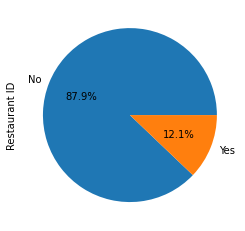

In [68]:
#5. Ratio between restaurants that allow table booking vs that do not allow table booking.
df.groupby(by='Has Table booking')['Restaurant ID'].count().plot.pie(autopct="%.1f%%")

In [69]:
df.groupby(by='Has Table booking')['Restaurant ID'].count().sort_values()

Has Table booking
Yes    1158
No     8393
Name: Restaurant ID, dtype: int64

In [ ]:
#12.1% allows table booking & rest donot allow


In [70]:
# 6.The percentage of restaurants providing online delivery
df.groupby(by='Has Online delivery')['Restaurant ID'].count().sort_values()

Has Online delivery
Yes    2451
No     7100
Name: Restaurant ID, dtype: int64

<AxesSubplot:ylabel='Restaurant ID'>

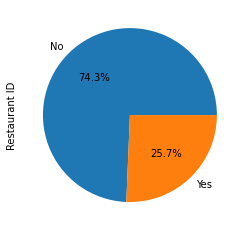

In [71]:
 df.groupby(by='Has Online delivery')['Restaurant ID'].count().plot.pie(autopct="%.1f%%")


In [ ]:
#25.7% have online delivery

In [72]:
#7. Is there a difference in number of votes for the restaurants that deliver and the restaurant that don’t
df.groupby(by='Has Online delivery')['Votes'].sum().sort_values()

Has Online delivery
Yes    517914
No     980731
Name: Votes, dtype: int64

<AxesSubplot:ylabel='Votes'>

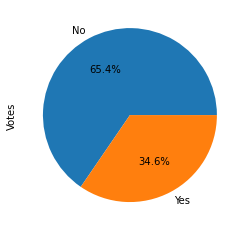

In [73]:
 df.groupby(by='Has Online delivery')['Votes'].sum().plot.pie(autopct="%.1f%%")

In [74]:
 #Average number of votes Received: Online delivery vs No online delivery
df.groupby(by='Has Online delivery')['Votes'].mean()

Has Online delivery
No     138.131127
Yes    211.307222
Name: Votes, dtype: float64

In [ ]:
#Obsevation: Restaurants providing online delivery has got highe number of votes

In [75]:
 df['Cuisines'].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
9546    True
9547    True
9548    True
9549    True
9550    True
Name: Cuisines, Length: 9551, dtype: bool

In [76]:
 df['Cuisines'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Cuisines, Length: 9551, dtype: bool

In [77]:
 df['Cuisines'].isnull().sum()

9

In [78]:
 x = df[df['Cuisines'].isnull()]

In [79]:
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11


In [80]:
x.shape

(9, 19)

In [81]:
df['Cuisines'].fillna('NotAvailable', inplace=True)

In [82]:
df[df['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes


In [83]:
 df[df['Cuisines']=='NotAvailable']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NotAvailable,40,Dollar($),No,No,3,3.9,Yellow,Good,209
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NotAvailable,40,Dollar($),No,No,3,3.8,Yellow,Good,102
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NotAvailable,40,Dollar($),No,No,3,4.4,Green,Very Good,1158
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NotAvailable,10,Dollar($),No,No,1,3.9,Yellow,Good,160
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NotAvailable,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NotAvailable,10,Dollar($),No,No,1,3.9,Yellow,Good,309
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NotAvailable,0,Dollar($),No,No,1,3.4,Orange,Average,34
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NotAvailable,0,Dollar($),No,No,1,3.4,Orange,Average,36
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NotAvailable,0,Dollar($),No,No,1,3.4,Orange,Average,11


In [84]:
 dfcuisines = df['Cuisines'].apply(lambda x: pd.Series(x.split(',')))

In [85]:
dfcuisines

,0,1,2,3,4,5,6,7
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
 dfcuisines = df["Cuisines"].str.split(',', expand=True)

In [87]:
 print(dfcuisines)

                0              1             2           3         4  \
0         Italian    Continental          None        None      None   
1           Asian     Indonesian       Western        None      None   
2           Sushi       Japanese          None        None      None   
3        Japanese           None          None        None      None   
4          French        Western          None        None      None   
...           ...            ...           ...         ...       ...   
9546      Chinese   North Indian     Fast Food        None      None   
9547       Indian        Chinese   Continental        None      None   
9548         Cafe    Continental      Desserts   Ice Cream   Italian   
9549  Street Food           None          None        None      None   
9550      Chinese   North Indian          None        None      None   

               5     6     7  
0           None  None  None  
1           None  None  None  
2           None  None  None  
3          

In [88]:
dfcuisines = df['Cuisines'].apply(lambda x: pd.Series(x.split(',')))

In [89]:
print(dfcuisines)

                0              1             2           3         4  \
0         Italian    Continental           NaN         NaN       NaN   
1           Asian     Indonesian       Western         NaN       NaN   
2           Sushi       Japanese           NaN         NaN       NaN   
3        Japanese            NaN           NaN         NaN       NaN   
4          French        Western           NaN         NaN       NaN   
...           ...            ...           ...         ...       ...   
9546      Chinese   North Indian     Fast Food         NaN       NaN   
9547       Indian        Chinese   Continental         NaN       NaN   
9548         Cafe    Continental      Desserts   Ice Cream   Italian   
9549  Street Food            NaN           NaN         NaN       NaN   
9550      Chinese   North Indian           NaN         NaN       NaN   

               5    6    7  
0            NaN  NaN  NaN  
1            NaN  NaN  NaN  
2            NaN  NaN  NaN  
3            NaN  N

In [90]:
 df1 = pd.read_excel("./data3.xlsx")

In [91]:
dfcuisines = df1["Cuisines"].str.split(',', expand=True)
print(dfcuisines)

                0              1             2           3         4  \
0         Italian    Continental          None        None      None   
1           Asian     Indonesian       Western        None      None   
2           Sushi       Japanese          None        None      None   
3        Japanese           None          None        None      None   
4          French        Western          None        None      None   
...           ...            ...           ...         ...       ...   
9546      Chinese   North Indian     Fast Food        None      None   
9547       Indian        Chinese   Continental        None      None   
9548         Cafe    Continental      Desserts   Ice Cream   Italian   
9549  Street Food           None          None        None      None   
9550      Chinese   North Indian          None        None      None   

               5     6     7  
0           None  None  None  
1           None  None  None  
2           None  None  None  
3          

In [92]:
print(type(df1["Cuisines"]))

<class 'pandas.core.series.Series'>


In [93]:
dfcuisines.columns=['Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']

In [94]:
dfcuisines.head()

,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,Italian,Continental,None,None,None,None,None,None
1,Asian,Indonesian,Western,None,None,None,None,None
2,Sushi,Japanese,None,None,None,None,None,None
3,Japanese,None,None,None,None,None,None,None
4,French,Western,None,None,None,None,None,None


In [95]:
 #combinibg the two dat frames, i.e. adding cusines into patent data frame
dfcombined=pd.concat([df1, dfcuisines],axis=1)

In [96]:
 dfcombined.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Rating text,Votes,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Very Good,1498,Italian,Continental,None,None,None,None,None,None
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Excellent,873,Asian,Indonesian,Western,None,None,None,None,None
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,Excellent,605,Sushi,Japanese,None,None,None,None,None,None
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,Very Good,395,Japanese,None,None,None,None,None,None,None
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,Very Good,243,French,Western,None,None,None,None,None,None


In [100]:
#finding restaurant wise cuisines
restid=pd.DataFrame(dfcombined[['Restaurant Name', 'Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']])

In [101]:
restid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  9550 non-null   object
 1   Cuisine1         9542 non-null   object
 2   Cuisine2         6148 non-null   object
 3   Cuisine3         2704 non-null   object
 4   Cuisine4         864 non-null    object
 5   Cuisine5         280 non-null    object
 6   Cuisine6         116 non-null    object
 7   Cuisine7         42 non-null     object
 8   Cuisine8         14 non-null     object
dtypes: object(9)
memory usage: 671.7+ KB


In [102]:
restid.head()

,Restaurant Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,Skye,Italian,Continental,None,None,None,None,None,None
1,Satoo - Hotel Shangri-La,Asian,Indonesian,Western,None,None,None,None,None
2,Sushi Masa,Sushi,Japanese,None,None,None,None,None,None
3,3 Wise Monkeys,Japanese,None,None,None,None,None,None,None
4,Avec Moi Restaurant and Bar,French,Western,None,None,None,None,None,None


In [103]:
restid_stack=pd.DataFrame(restid.stack())

In [105]:
 keys=[c for c in restid if c.startswith ('Cuisine')]
b=pd.melt(restid, id_vars='Restaurant Name', value_vars=keys,value_name='Cuisines')

In [106]:
b

,Restaurant Name,variable,Cuisines
0,Skye,Cuisine1,Italian
1,Satoo - Hotel Shangri-La,Cuisine1,Asian
2,Sushi Masa,Cuisine1,Sushi
3,3 Wise Monkeys,Cuisine1,Japanese
4,Avec Moi Restaurant and Bar,Cuisine1,French
...,...,...,...
76403,BMG - All Day Dining,Cuisine8,None
76404,Atmosphere Grill Cafe Sheesha,Cuisine8,None
76405,UrbanCrave,Cuisine8,None
76406,Deena Chat Bhandar,Cuisine8,None


In [107]:
 #maxrestid=b.groupby(['Restaurant Name'])[['Cuisines']].count()
maxrestid=b.groupby(['Restaurant Name']).agg({"Cuisines":"nunique"})
maxrestid.head()

,Cuisines
Restaurant Name,
12212,1
Let's Burrrp,2
#45,1
#Dilliwaala6,1
#InstaFreeze,1


In [108]:
maxrestid=maxrestid.sort_values(by=['Cuisines'],ascending=False)

In [109]:
 maxrestid

,Cuisines
Restaurant Name,
Barbeque Nation,15
Bikaner Sweets,12
Aggarwal Sweets,11
Haldiram's,10
Bikanervala,10
...,...
Dovetail,0
Cookie Shoppe,0
HI Lite Bar & Lounge,0


In [110]:
maxrestid.to_excel('RestaurantswithMaxCuisines.xlsx')

In [112]:
city=pd.DataFrame(dfcombined[['City','Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']])

In [113]:
city.head()

,City,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,Jakarta,Italian,Continental,None,None,None,None,None,None
1,Jakarta,Asian,Indonesian,Western,None,None,None,None,None
2,Jakarta,Sushi,Japanese,None,None,None,None,None,None
3,Jakarta,Japanese,None,None,None,None,None,None,None
4,Jakarta,French,Western,None,None,None,None,None,None


In [114]:
city_stack=pd.DataFrame(city.stack())

In [115]:
city_stack

0
0    City            Jakarta
     Cuisine1        Italian
     Cuisine2    Continental
1    City            Jakarta
     Cuisine1          Asian
...                      ...
9549 City           Varanasi
     Cuisine1    Street Food
9550 City           Varanasi
     Cuisine1        Chinese
     Cuisine2   North Indian

[29261 rows x 1 columns]

In [116]:
 keys = [c for c in city if c.startswith ('Cuisine')]
a = pd.melt(city, id_vars='City', value_vars=keys, value_name='Cuisines')

In [117]:
a

,City,variable,Cuisines
0,Jakarta,Cuisine1,Italian
1,Jakarta,Cuisine1,Asian
2,Jakarta,Cuisine1,Sushi
3,Jakarta,Cuisine1,Japanese
4,Jakarta,Cuisine1,French
...,...,...,...
76403,Dehradun,Cuisine8,None
76404,Kanpur,Cuisine8,None
76405,Kanpur,Cuisine8,None
76406,Varanasi,Cuisine8,None


In [118]:
max_cuisines=pd.DataFrame(a.groupby(by=['City','variable','Cuisines']).size().reset_index())

In [119]:
max_cuisines

,City,variable,Cuisines,0
0,Abu Dhabi,Cuisine1,American,4
1,Abu Dhabi,Cuisine1,Asian,1
2,Abu Dhabi,Cuisine1,Chinese,1
3,Abu Dhabi,Cuisine1,Fast Food,1
4,Abu Dhabi,Cuisine1,Filipino,1
...,...,...,...,...
3086,€¡stanbul,Cuisine2,Patisserie,1
3087,€¡stanbul,Cuisine2,Turkish,1
3088,€¡stanbul,Cuisine2,World Cuisine,1
3089,€¡stanbul,Cuisine3,Cafe,1


In [120]:
del max_cuisines['variable']

In [121]:
max_cuisines.columns=['City','Cuisines','Count']

In [123]:
max_cuisines.head()

,City,Cuisines,Count
0,Abu Dhabi,American,4
1,Abu Dhabi,Asian,1
2,Abu Dhabi,Chinese,1
3,Abu Dhabi,Fast Food,1
4,Abu Dhabi,Filipino,1


In [124]:
cuis=max_cuisines.groupby(['Cuisines'])[['Count']].sum()
cuis.head()

,Count
Cuisines,
Afghani,7
African,6
American,112
Andhra,7
Arabian,23


In [125]:
cuis2=max_cuisines.groupby(['City','Cuisines'])[['Count']].sum()

In [126]:
cuis2.head()

Count
City      Cuisines       
Abu Dhabi  Afghani      1
           Arabian      2
           Asian        1
           Biryani      1
           Burger       1

In [127]:
cuis2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2400 entries, ('Abu Dhabi', ' Afghani') to ('€¡stanbul', 'World Cuisine')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   2400 non-null   int64
dtypes: int64(1)
memory usage: 31.3+ KB


In [128]:
cuis2=cuis2.sort_values(by=['Count'],ascending=False)

In [129]:
cuis2

Count
City      Cuisines            
New Delhi North Indian    1848
           Chinese        1069
           Fast Food       858
           North Indian    577
          Chinese          569
...                        ...
Guwahati   Arabian           1
           American          1
Gurgaon   Tibetan            1
          Steak              1
€¡stanbul World Cuisine      1

[2400 rows x 1 columns]

In [130]:
cuis=cuis.sort_values(by=['Count'],ascending=False)

In [131]:
cuis

,Count
Cuisines,
North Indian,2992
Chinese,1880
Fast Food,1314
North Indian,968
Chinese,855
...,...
Ramen,1
Cuisine Varies,1
Cuban,1


In [132]:
cuis.to_excel("Top10Cusines.xlsx")

In [133]:
cuis2.to_excel("CityWiseTopCuisine.xlsx")

In [134]:
 loc=max_cuisines.sort_values(by=['Count'],ascending=False).groupby(by=['City'],as_index=False).first()
loc.head(10)


,City,Cuisines,Count
0,Abu Dhabi,Indian,6
1,Agra,North Indian,12
2,Ahmedabad,North Indian,7
3,Albany,American,4
4,Allahabad,North Indian,10
5,Amritsar,North Indian,15
6,Ankara,Kebab,10
7,Armidale,Bar Food,1
8,Athens,American,5
9,Auckland,Cafe,4


In [135]:
loc=loc.sort_values(by=['Count'],ascending=False)

In [136]:
loc

,City,Cuisines,Count
87,New Delhi,North Indian,1848
88,Noida,North Indian,433
50,Gurgaon,North Indian,367
43,Faridabad,North Indian,102
5,Amritsar,North Indian,15
...,...,...,...
106,Quezon City,Mexican,1
15,Beechworth,Pizza,1
108,Randburg,Cafe,1
80,Mohali,Continental,1


In [137]:
loc.to_excel('CityWiseMaxCuisines.xlsx')

In [ ]:
 #10.What is the distribution cost across restaurants
#sns.distplot(df['Average Cost for two'],hist=False)

In [138]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78


<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

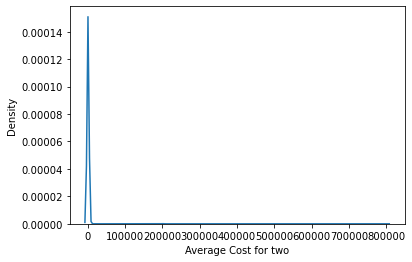

In [139]:
sns.distplot(df['Average Cost for two'],hist=False)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Density'>

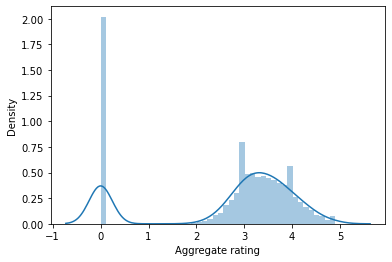

In [140]:
sns.distplot(df['Aggregate rating'])

In [141]:
df['Aggregate rating'].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [ ]:
#sns.distplot(df.loc[df['Aggregate rating']]>0.1)

In [142]:
import statsmodels.formula.api as smf

In [ ]:
#lm=smf.ols(formula='Aggregate rating ~ Average Cost for two',data=df).fit()

In [143]:
df.columns=df.columns.str.replace(" ","_")
x=df['Average_Cost_for_two']
y=df['Aggregate_rating']
32
import statsmodels.formula.api as smf
lm = smf.ols(formula='Aggregate_rating ~ Average_Cost_for_two', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Aggregate_rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     25.68
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           4.10e-07
Time:                        00:11:20   Log-Likelihood:                -17515.
No. Observations:                9551   AIC:                         3.503e+04
Df Residuals:                    9549   BIC:                         3.505e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.6605      0.016    171.217      0.000       2.630       2.691
Average_Cost_for_two  4.872e-06   9.61e-07      5.068      0.000    2.99e-06    6.76e-06
==============================================================================
Omnibus:                     1339.268   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.559
Skew:                          -0.954   Prob(JB):                         0.00
Kurtosis:                       2.416   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""